In [1]:
from repository import *
from models import *
from funciones import *
from modelos_metodo_integral import *

In [2]:
import pandas as pd
from pandas import *

In [3]:
funciones = Funciones()


RegistroDataExperimentalManejador = RegistroDataExperimentalManejador()
CondicionesInicialesManejador = CondicionesInicialesManejador()
DatosCineticosManejador = DatosCineticosManejador()
ReaccionQuimicaManejador = ReaccionQuimicaManejador()

MetodoIntegralModelos = MetodoIntegralModelos()



In [4]:

def imprimir_registro_seleccionado_consola(nombre_data, return_df="condiciones"):
    
    if not nombre_data:
        return

    filtros = {'nombre_data': nombre_data}
    condiciones = CondicionesInicialesManejador.consultar_condicion(filtros=filtros)

    # Convertir las condiciones a un DataFrame de pandas
    df_condiciones_iniciales = pd.DataFrame.from_records([condicion.__dict__ for condicion in condiciones])

    #print(df_condiciones_iniciales)

    datos_cineticos = DatosCineticosManejador.consultar_datos(filtros=filtros)

    # Convertir los datos a un DataFrame de pandas
    df_datos_cineticos_listos = pd.DataFrame.from_records([dato.__dict__ for dato in datos_cineticos])

    # Obtener el nombre de la reacción de la base de datos datos_ingresados_cineticos
    nombre_reaccion = df_datos_cineticos_listos['nombre_reaccion'].iloc[0]

    filtro_reaccion = {'nombre_reaccion': nombre_reaccion}
    reaccion_quimica = ReaccionQuimicaManejador.consultar_reaccion(filtros=filtro_reaccion)

    # Convertir la reacción química a un DataFrame de pandas
    df_reaccion_quimica = pd.DataFrame.from_records([reaccion.__dict__ for reaccion in reaccion_quimica])

    #print(df_reaccion_quimica)

    # Devolver el DataFrame correspondiente
    if return_df == "condiciones":
        return df_condiciones_iniciales
    elif return_df == "datos":
        return df_datos_cineticos_listos
    elif return_df == "reaccion":
        return df_reaccion_quimica

In [5]:
# Llamar a la función y almacenar el DataFrame en una variable
nombre_data = "01_DisenoReactores_Roman_p2r_p25"
df_datos_cineticos_listos_ejemplo = imprimir_registro_seleccionado_consola(nombre_data,"datos")
#print(df_datos_cineticos_listos_ejemplo)

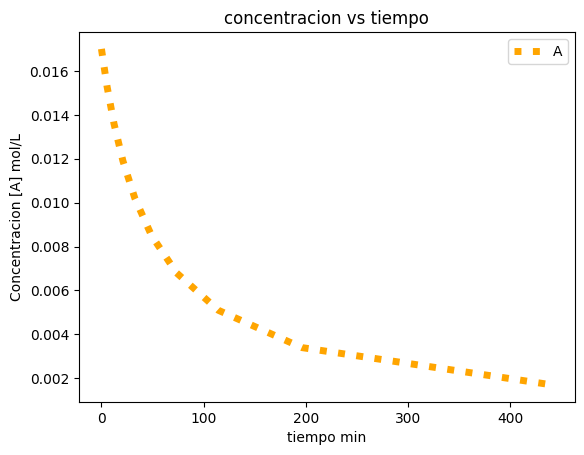

In [6]:
# Graficar los datos
funciones.graficar_datos_experimentales_iniciales(df_datos_cineticos_listos_ejemplo["tiempo"], df_datos_cineticos_listos_ejemplo["concentracion"], "tiempo min", "Concentracion [A] mol/L", "concentracion vs tiempo", "A")

In [7]:
MetodoIntegralAjustador.ajustar_modelo_n_orden(df_datos_cineticos_listos_ejemplo, "tiempo", "concentracion",1.1,1.7)

k_ord_n_optimo: 1.2000000014024281
A_0_optimo: 0.0170000000000901
n_optimo: 2.000000000256838


(1.2000000014024281, 0.0170000000000901, 2.000000000256838)

In [8]:
k_ord_n, A_0, n_c = MetodoIntegralAjustador.ajustar_modelo_n_orden(df_datos_cineticos_listos_ejemplo, "tiempo", "concentracion",1.1,1.7)

k_ord_n_optimo: 1.2000000014024281
A_0_optimo: 0.0170000000000901
n_optimo: 2.000000000256838


In [9]:
df_datos_cineticos_condiciones_iniciales = imprimir_registro_seleccionado_consola(nombre_data,"condiciones")
#print(df_datos_cineticos_condiciones_iniciales)

In [10]:
df_datos_cineticos_reaccion_quimica = imprimir_registro_seleccionado_consola(nombre_data,"reaccion")
print(df_datos_cineticos_reaccion_quimica)

                                  _sa_instance_state  \
0  <sqlalchemy.orm.state.InstanceState object at ...   
1  <sqlalchemy.orm.state.InstanceState object at ...   

   coeficiente_estequiometrico  id        tipo_especie especie_quimica  \
0                          2.0   1  reactivo_limitante               A   
1                          1.0   2            producto               R   

  formula                   detalle nombre_reaccion  
0       A  Reacción de A en R 2A=>R           2A=>R  
1       R  Reacción de A en R 2A=>R           2A=>R  


In [11]:
# Obtener los coeficientes estequiométricos como listas completas
coeficientes_productos = df_datos_cineticos_reaccion_quimica[df_datos_cineticos_reaccion_quimica["tipo_especie"] == "producto"]["coeficiente_estequiometrico"].tolist()
coeficientes_reactivos = df_datos_cineticos_reaccion_quimica[df_datos_cineticos_reaccion_quimica["tipo_especie"] == "reactivo_limitante"]["coeficiente_estequiometrico"].tolist()

print(coeficientes_productos)
print(coeficientes_reactivos)

[1.0]
[2.0]


In [12]:
# Calcular delta_n
delta_n = funciones.calcular_delta_n(coeficientes_productos, coeficientes_reactivos)
print("Delta_n:", delta_n)

yA_0 = df_datos_cineticos_condiciones_iniciales["fraccion_molar"][0]

a=df_datos_cineticos_reaccion_quimica["coeficiente_estequiometrico"][0]

epsilon_a = funciones.calcular_epsilon_A(yA_0,delta_n,a)

print("coeficiente a:", a)
print("yA_0:", yA_0)
print("Epsilon A:", epsilon_a)

# Filtrar el DataFrame por el tipo de especie "producto" y la especie_quimica "R"
producto_R = df_datos_cineticos_reaccion_quimica[(df_datos_cineticos_reaccion_quimica["tipo_especie"] == "producto") & (df_datos_cineticos_reaccion_quimica["especie_quimica"] == "R")]

# Obtener el coeficiente estequiométrico del producto "R"
coeficiente_producto_R = producto_R["coeficiente_estequiometrico"].iloc[0]

# Filtrar el DataFrame por el tipo de especie "reactivo_limitante" y la especie_quimica "A"
reactivo_A = df_datos_cineticos_reaccion_quimica[(df_datos_cineticos_reaccion_quimica["tipo_especie"] == "reactivo_limitante") & (df_datos_cineticos_reaccion_quimica["especie_quimica"] == "A")]
# Obtener el coeficiente estequiométrico del producto "A"
coeficiente_reactivo_A = reactivo_A["coeficiente_estequiometrico"].iloc[0]

# Filtrar el DataFrame por el tiempo = 0, el tipo de especie "reactivo_limitante" y la especie química "A"
reactivo_limitante_A_t0 = df_datos_cineticos_listos_ejemplo[(df_datos_cineticos_listos_ejemplo["tiempo"] == 0) & (df_datos_cineticos_listos_ejemplo["tipo_especie"] == "reactivo_limitante") & (df_datos_cineticos_listos_ejemplo["especie_quimica"] == "A")]

# Obtener la concentración inicial del reactivo limitante "A"
concentracion_inicial_A = reactivo_limitante_A_t0["concentracion"].iloc[0]

print(concentracion_inicial_A)

print("coef_r R", coeficiente_producto_R)
print("coef_a A", coeficiente_reactivo_A)

Delta_n: -1.0
coeficiente a: 2.0
yA_0: 0.4
Epsilon A: -0.2
0.017
coef_r R 1.0
coef_a A 2.0


In [13]:
#almacenar en un dataframe el valor de la concentracion del Reactivo R
concentracion_R = funciones.concentracion_Producto(0,coeficiente_producto_R,coeficiente_reactivo_A,df_datos_cineticos_listos_ejemplo['conversion_reactivo_limitante'],concentracion_inicial_A)


# Asegurarse de que 'concentracion_R' es una lista o un array de numpy
concentracion_R_col = np.array(concentracion_R)

# Crear un nuevo DataFrame con los valores y características deseadas
nuevo_df = pd.DataFrame({
    'tiempo': df_datos_cineticos_listos_ejemplo["tiempo"],
    'concentracion': concentracion_R_col,
    'conversion_reactivo_limitante': df_datos_cineticos_listos_ejemplo["conversion_reactivo_limitante"],
    'tipo_especie': ['producto'] * len(concentracion_R),
    'id_condiciones_iniciales': [1] * len(concentracion_R),
    'nombre_data': [nombre_data] * len(concentracion_R),
    'nombre_reaccion': df_datos_cineticos_listos_ejemplo["nombre_reaccion"],
    'especie_quimica': ['R'] * len(concentracion_R)
})

#print (nuevo_df)    

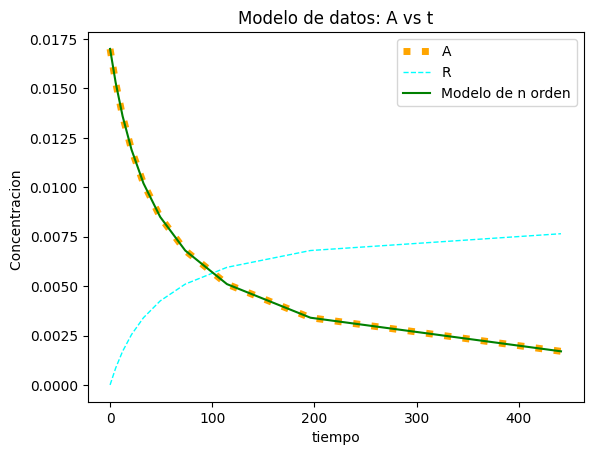

In [14]:
MetodoIntegralGraficador.graficar_modelo(df_datos_cineticos_listos_ejemplo, "tiempo", "concentracion", nuevo_df,"concentracion",k_ord_n, n_c)